In [10]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import seaborn as sns

In [2]:
data = pd.read_csv('/Users/weronikakahan/PycharmProjects/Evolutionary-Algorithms-project/ela_features_with_classes.csv')

In [3]:
X = data[['int', 'lr2', 'max', 'eps_ratio', 'disp', 'nbc']]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#todo: investigate why the silhouette score is so low and try with removing outliers 

In [17]:
def plot_kmeans_silhouette(X, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title("Silhouette Score for K-Means Clustering")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

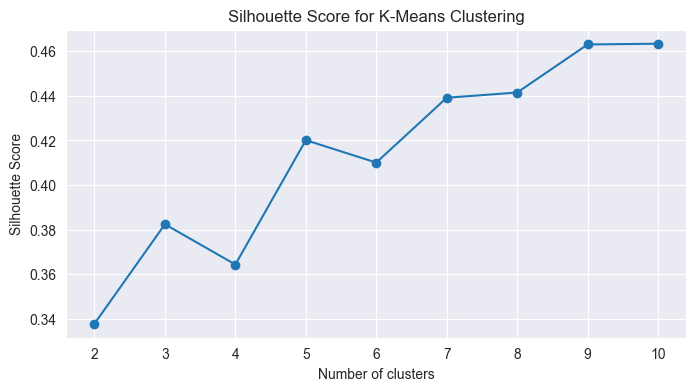

In [18]:
plot_kmeans_silhouette(X_scaled)

In [11]:
clustering_results_df = pd.DataFrame(columns=['Algorithm', 'Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score'])


In [12]:
def evaluate_clustering(algorithm_name, labels, X_scaled):
    if len(set(labels)) > 1: 
        silhouette = silhouette_score(X_scaled, labels)
        davies_bouldin = davies_bouldin_score(X_scaled, labels)
        calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    else:  #for DBSCAN, which can sometimes label everything as noise (-1)
        silhouette = davies_bouldin = calinski_harabasz = "N/A"
    return [algorithm_name, silhouette, davies_bouldin, calinski_harabasz]

In [13]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
evaluate_clustering('K-Means', kmeans_labels, X_scaled)
clustering_results_df.loc[0] = evaluate_clustering('K-Means', kmeans_labels, X_scaled)

In [14]:
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(X_scaled)
evaluate_clustering('Agglomerative', agg_labels, X_scaled)
clustering_results_df.loc[1] = evaluate_clustering('Agglomerative', agg_labels, X_scaled)

In [15]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
evaluate_clustering('DBSCAN', dbscan_labels, X_scaled)
clustering_results_df.loc[2] = evaluate_clustering('DBSCAN', dbscan_labels, X_scaled)

In [16]:
clustering_results_df

,Algorithm,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,K-Means,0.463401,0.663866,838.217323
1,Agglomerative,0.475191,0.664045,870.854734
2,DBSCAN,0.419059,0.768887,298.108337
